# Project: Housing Price Prediction using Machine Learning

**os** → Used to interact with the operating system, such as accessing files and directories.

In [2]:
import os


**math →** Provides basic mathematical functions like square root, power, and logarithms.

In [3]:
import math

**numpy (np)** → Used for numerical computing, array operations, and fast mathematical calculations.

In [4]:
import numpy as np

**pandas (pd)** → Used for data loading, cleaning, manipulation, and analysis using DataFrames.

```
# This is formatted as code
```



In [5]:

import pandas as pd

**matplotlib.pyplot (plt)** → Used to create basic data visualizations such as line, bar, and scatter plots.

In [6]:
import matplotlib.pyplot as plt

**seaborn (sns)** → Used for advanced and statistical data visualizations with attractive plots.

In [7]:

import seaborn as sns

**train_test_split** → Splits the dataset into training and testing sets to evaluate model performance.

In [8]:
# Modeling
from sklearn.model_selection import train_test_split


**ColumnTransformer** → Applies different preprocessing steps to numerical and categorical columns separately.

In [9]:
from sklearn.compose import ColumnTransformer

1. **OneHotEncoder** → Converts categorical variables into numerical format using one-hot encoding.
2. **StandardScaler** → Scales numerical features so they have zero mean and unit variance.
3. **PolynomialFeatures** → Generates polynomial and interaction features for polynomial regression models.










In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

**Pipeline** → Combines preprocessing and modeling steps into a single, clean workflow.

In [11]:
from sklearn.pipeline import Pipeline

**LinearRegression** → Implements linear and multiple linear regression for prediction tasks.

In [12]:
from sklearn.linear_model import LinearRegression

**KNeighborsRegressor** → Predicts values based on the average of nearest data points (KNN regression).

In [13]:
from sklearn.neighbors import KNeighborsRegressor

**DecisionTreeRegressor** → Builds a tree-based model that learns decision rules from data.

In [14]:
from sklearn.tree import DecisionTreeRegressor


1. **mean_absolute_error** → Measures the average absolute difference between actual and predicted values.

2. **mean_squared_error** → Measures the average squared difference between actual and predicted values.

3. **r2_score**→ Evaluates how well the model explains the variance in the target variable.



In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**mutual_info_regression** → Measures dependency between features and target for feature selection.

In [16]:
from sklearn.feature_selection import mutual_info_regression

**2.EDA:Load dataset & visualization**

In [17]:
url = 'https://raw.githubusercontent.com/tedolight/Machine-Learning-Regression-Models-using-House-Price-Dataset/refs/heads/main/Housing%20Price.csv'
df = pd.read_csv(url)


1.**sns.set(style="whitegrid")** → Sets a clean white-grid visual style for all Seaborn and Matplotlib plots.

2.**pd.set_option("display.max_columns", 100)** → Allows Pandas to display up to 100 columns when printing DataFrames.

3.**pd.set_option("display.precision", 3)** → Limits numerical values in DataFrames to 3 decimal places for readability.

In [18]:

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.precision", 3)

print("Step 1: Libraries imported")


Step 1: Libraries imported


**a.df.columns = df.columns.str.strip()** → Removes leading and trailing spaces from column names to avoid errors.

**b.print("\nStep 2: Dataset loaded.")** → Displays a message confirming that the dataset has been successfully loaded.

**c.print("Shape:", df.shape)** → Shows the number of rows and columns in the dataset.

**d.print("\nData types:\n", df.dtypes)**→ Displays the data type of each column.

**e.print("\nMissing values per column:\n", df.isna().sum())** → Counts and displays missing values in each column.

**f.print("\nFirst 10 rows:")** → Prints a label before displaying sample data.

**g.print(df.head(10).to_string(index=False))** → Displays the first 10 rows of the dataset without row indices.


In [ ]:


df.columns = df.columns.str.strip()

print("\nStep 2: Dataset loaded.")



Step 2: Dataset loaded.


In [ ]:
print("Shape:", df.shape)

Shape: (545, 13)


In [ ]:
print("\nData types:\n", df.dtypes)


Data types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [ ]:
print("\nMissing values per column:\n", df.isna().sum())


Missing values per column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
print("\nFirst 10 rows:")
print(df.head(10).to_string(index=False))


First 10 rows:
   price  area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
13300000  7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
12250000  8960         4          4        4      yes        no       no              no             yes        3       no        furnished
12250000  9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
12215000  7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished
11410000  7420         4          1        2      yes       yes      yes              no             yes        2       no        furnished
10850000  7500         3          3        1      yes        no      yes              no             yes        2      yes   semi-furnished
1015

1. **num_cols = df.select_dtypes(include=[np.number]).columns.tolist()** → *Identifies and stores all numerical feature column names.*

2. **cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()** → *Identifies and stores all categorical (non-numerical) feature column names.*


In [ ]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)

print("\nSummary statistics (numeric):")
print(df[num_cols].describe().round(2).to_string())



Numeric columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Summary statistics (numeric):
           price      area  bedrooms  bathrooms  stories  parking
count  5.450e+02    545.00    545.00     545.00   545.00   545.00
mean   4.767e+06   5150.54      2.97       1.29     1.81     0.69
std    1.870e+06   2170.14      0.74       0.50     0.87     0.86
min    1.750e+06   1650.00      1.00       1.00     1.00     0.00
25%    3.430e+06   3600.00      2.00       1.00     1.00     0.00
50%    4.340e+06   4600.00      3.00       1.00     2.00     0.00
75%    5.740e+06   6360.00      3.00       2.00     2.00     1.00
max    1.330e+07  16200.00      6.00       4.00     4.00     3.00


#    **Visual EDA (simple visible plots)**
**1.plt.figure(figsize=(8,5))** → Creates a new figure with a specified width and height.

**2.sns.histplot(df['price'], bins=30, kde=True, color='#4C78A8')** → Plots a histogram of house prices with a density curve to show distribution.

**3.plt.title('Distribution of Price')** → Sets the title of the histogram.

**4.plt.xlabel('Price')** → Labels the x-axis of the histogram.

**5.plt.ylabel('Count')** → Labels the y-axis of the histogram.

**6.plt.show()** → Displays the histogram plot.

**7.plt.figure(figsize=(8,5))** → Creates a new figure for the scatter plot.

**8.sns.scatterplot(x='area', y='price', data=df, alpha=0.7)** → Plots a scatter graph showing the relationship between area and price.

**9.plt.title('Price vs. Area')** → Sets the title of the scatter plot.

**10.plt.xlabel('Area')** → Labels the x-axis of the scatter plot.

**11.plt.ylabel('Price')** → Labels the y-axis of the scatter plot.

**12.plt.show()** → Displays the scatter plot.


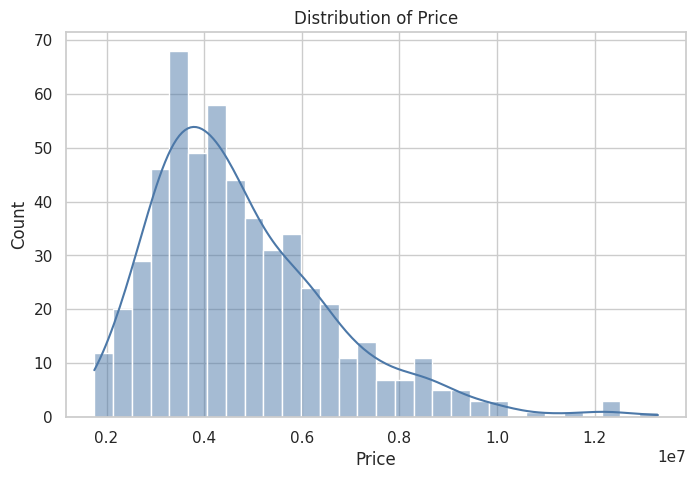

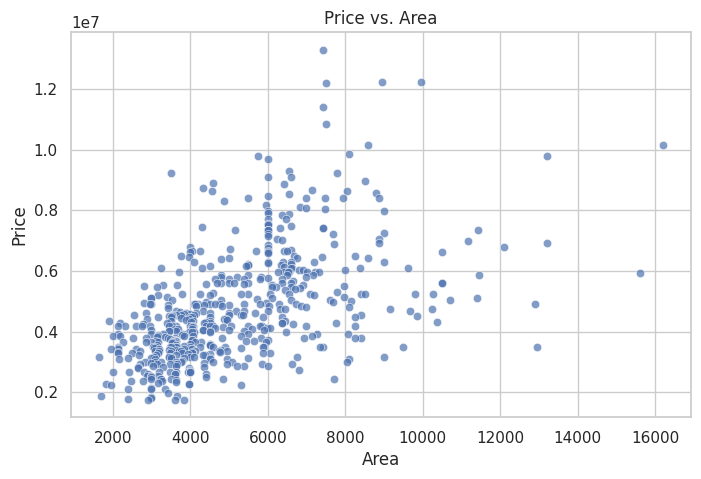

In [ ]:


plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='#4C78A8')
plt.title('Distribution of Price'); plt.xlabel('Price'); plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df, alpha=0.7)
plt.title('Price vs. Area'); plt.xlabel('Area'); plt.ylabel('Price')
plt.show()


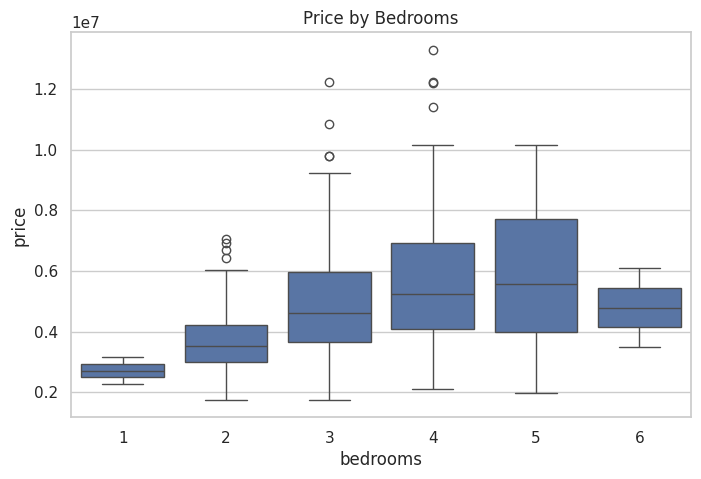

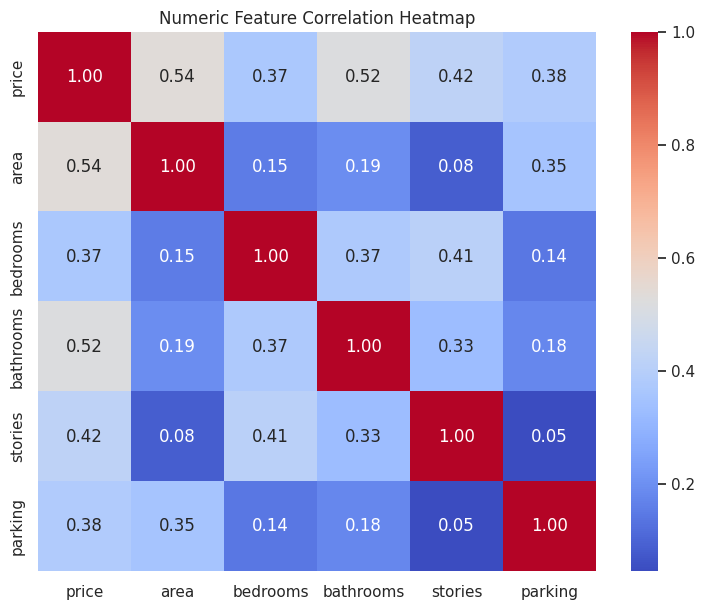

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price by Bedrooms')
plt.show()

plt.figure(figsize=(9,7))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric Feature Correlation Heatmap')
plt.show()


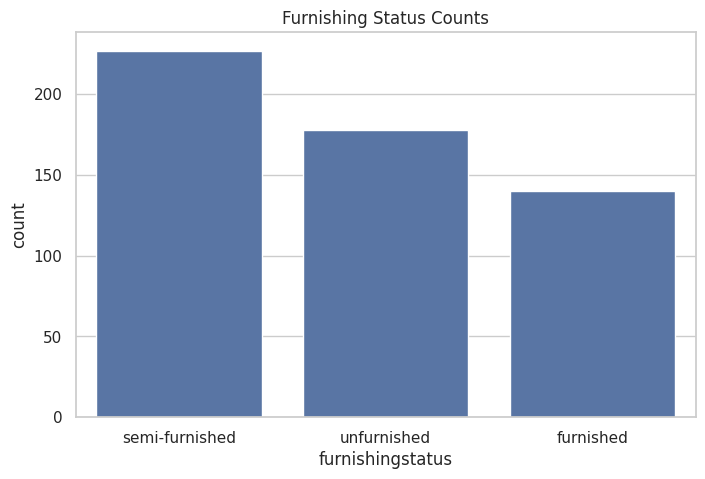

In [ ]:

plt.figure(figsize=(8,5))
order = df['furnishingstatus'].value_counts().index
sns.countplot(x='furnishingstatus', data=df, order=order)
plt.title('Furnishing Status Counts')
plt.show()


#          3.Data Cleaning



**for c in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']:** → *Iterates through selected categorical columns that need text normalization.*

**df[c] = df[c].astype(str).str.strip().str.lower()** → *Converts values to strings, removes extra spaces, and converts text to lowercase for consistency.*


In [19]:

# Normalize text categorical values
for c in ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']:
    df[c] = df[c].astype(str).str.strip().str.lower()


#            Remove duplicates
**1.dups_before = df.duplicated().sum()** → Counts the number of duplicate rows before removing them.

**2.df = df.drop_duplicates().reset_index(drop=True)** → Removes duplicate rows and resets the DataFrame index.

**3.dups_after = df.duplicated().sum()** → Counts the number of duplicate rows after cleaning.

**4.print(f"Duplicates before: {dups_before}, after: {dups_after}")** → Displays the number of duplicates before and after removal.


In [22]:


dups_before = df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)
dups_after = df.duplicated().sum()
print(f"Duplicates before: {dups_before}, after: {dups_after}")


Duplicates before: 0, after: 0


#        Handle missing (none expected, but keep logic)
1. Calculates the total number of missing values in the dataset.
2. Checks whether any missing values exist in the data.
3. Removes rows with missing values and resets the index if needed.
4. *Prints the total number of missing values after cleaning.*
5. *Prints a label before showing cleaned data samples*.
6. *Displays the first 5 rows of the cleaned dataset without row indices.*

In [23]:


missing_total = int(df.isna().sum().sum())
if missing_total > 0:
    df = df.dropna().reset_index(drop=True)
print("Missing total after cleaning:", int(df.isna().sum().sum()))

print("\nSample after cleaning:")
print(df.head(5).to_string(index=False))


Missing total after cleaning: 0

Sample after cleaning:
   price  area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
13300000  7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
12250000  8960         4          4        4      yes        no       no              no             yes        3       no        furnished
12250000  9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
12215000  7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished
11410000  7420         4          1        2      yes       yes      yes              no             yes        2       no        furnished


#      Map yes/no to 0/1 (binary features)
 1.Defines binary categorical columns with **yes/no** values.
 2.**for c in yn_cols**: → Iterates through each binary column.
 3. Converts **yes/no** text values into numerical binary values **(0 and 1).**

In [24]:


yn_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for c in yn_cols:
    df[c] = df[c].map({'no':0, 'yes':1})


#       One-hot for furnishingstatus JUST for scoring
1. Applies **one-hot encoding** to the *furnishingstatus column* and **avoids multicollinearity.**
2. Separates **feature variable**s by removing the **target column.**
3. Stores the **target variable** (price) for modeling
4. Selects **only numerical features** for mutual information scoring.

In [25]:


df_mi = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
X_mi = df_mi.drop(columns=['price'])
y_mi = df_mi['price']
X_mi_num = X_mi.select_dtypes(include=[np.number])


#          Mutual Information (captures non-linear dependencies)
1. Computes mutual information scores to measure non-linear dependency between features and the target.

2. Stores the scores in a Series and sorts features by importance.
3. Prints a label indicating the most informative features.
4. Displays the top 10 features with highest mutual information scores, rounded for readability.

In [26]:


mi_scores = mutual_info_regression(X_mi_num, y_mi, random_state=42)
mi_series = pd.Series(mi_scores, index=X_mi_num.columns).sort_values(ascending=False)

print("\nTop-10 Mutual Information features:")
print(mi_series.head(10).round(4).to_string())



Top-10 Mutual Information features:
area               0.278
bathrooms          0.147
parking            0.133
bedrooms           0.125
stories            0.114
airconditioning    0.087
prefarea           0.087
mainroad           0.081
guestroom          0.076
basement           0.025


#    Pearson correlation (absolute) with price for numeric columns
 1. Re-identifies numerical columns after feature transformations.
 2. Computes absolute Pearson correlation between numeric features and price, sorted by strength.
 3. Prints a label describing the correlation results.
 4. Displays the correlation values rounded for better readability.

In [27]:


num_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # recompute after mapping
pearson_abs = df[num_cols].corr()['price'].abs().sort_values(ascending=False)

print("\nAbsolute Pearson correlation with price (numeric):")
print(pearson_abs.round(4).to_string())



Absolute Pearson correlation with price (numeric):
price              1.000
area               0.536
bathrooms          0.517
airconditioning    0.453
stories            0.421
parking            0.384
bedrooms           0.366
prefarea           0.330
mainroad           0.297
guestroom          0.256
basement           0.187
hotwaterheating    0.093


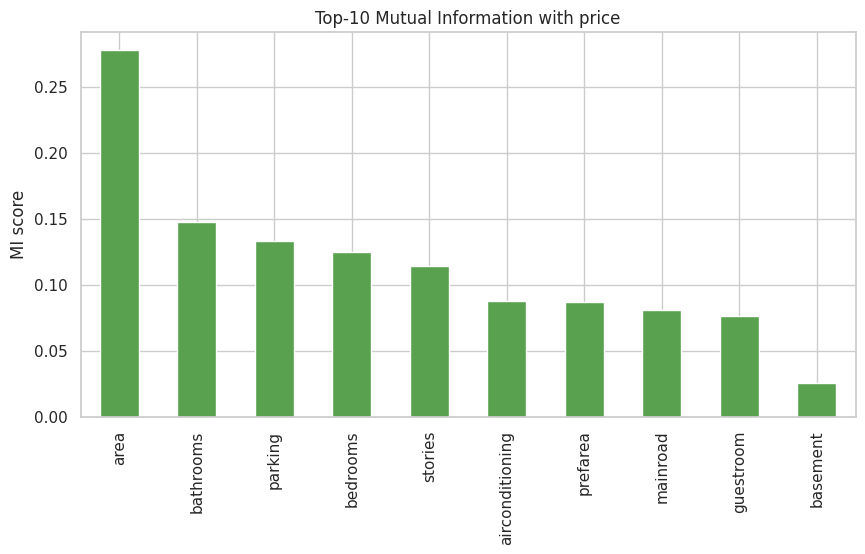

In [28]:

# Bar plots for quick visibility
plt.figure(figsize=(10,5))
mi_series.head(10).plot(kind='bar', color='#59A14F')
plt.title("Top-10 Mutual Information with price")
plt.ylabel("MI score")
plt.show()


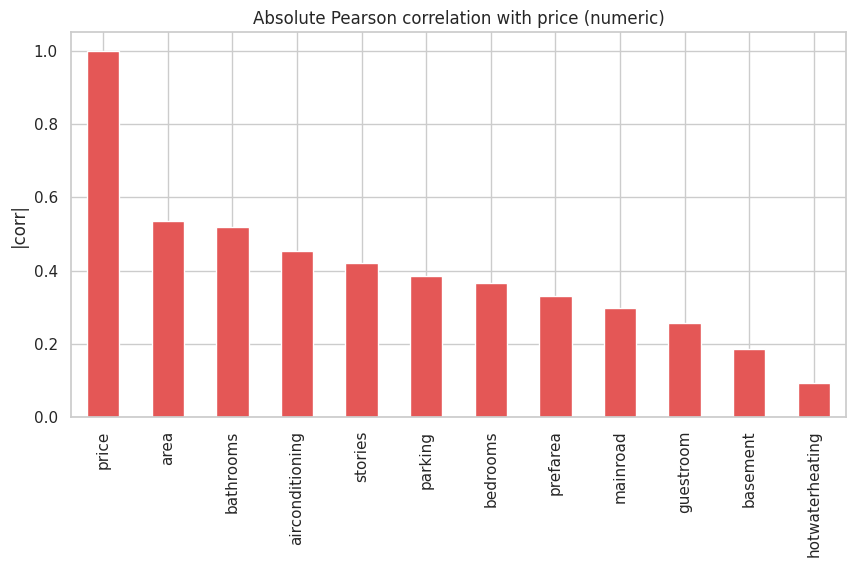

In [29]:

plt.figure(figsize=(10,5))
pearson_abs.plot(kind='bar', color='#E45756')
plt.title("Absolute Pearson correlation with price (numeric)")
plt.ylabel("|corr|")
plt.show()


# 5.Feature Engineering

1. Creates a feature representing average area per parking space while avoiding division by zero.
2. Creates a feature representing average area per story while avoiding division by zero.

In [30]:

df['area_per_parking'] = df['area'] / df['parking'].replace(0, 1)
df['area_per_story']   = df['area'] / df['stories'].replace(0, 1)


#        One-hot for furnishingstatus for modeling
 1. Applies **one-hot encoding** to furnishingstatus for use in machine learning models.
 2. Converts all columns to **integer type** for model compatibility.
 3.  Prints a **label indicating a preview** of newly engineered features.
 4. Displays **sample values** of the **newly created features**

In [31]:


df_final = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df_final=df_final.astype(int)

print("\nNew engineered columns preview:")
print(df_final[['area','parking','stories','area_per_parking','area_per_story']].head(5).to_string(index=False))

df_final.head()


New engineered columns preview:
 area  parking  stories  area_per_parking  area_per_story
 7420        2        3              3710            2473
 8960        3        4              2986            2240
 9960        2        2              4980            4980
 7500        3        2              2500            3750
 7420        2        2              3710            3710


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,area_per_parking,area_per_story,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3710,2473,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2986,2240,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,4980,4980,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2500,3750,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3710,3710,0,0


#       6. Dataset Splitting into Training, Validation, and Test Sets
1. Defines the target variable to be predicted.
2. Selects all columns **except the target** as **input features.**
3. Creates the feature matrix.
4. Creates the target vector.
5. Splits the data into training+validation and test sets.
6. Splits training+validation data into training and validation sets (60/20 split)
a. Displays the shape of the training dataset.
b. Displays the shape of the validation dataset.
c. Displays the shape of the test dataset.


In [32]:

TARGET = 'price'
FEATURES = [c for c in df_final.columns if c != TARGET]

X = df_final[FEATURES]
y = df_final[TARGET]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,

test_size=0.25, random_state=42)  # 0.25 of 0.80 = 0.20

print("Train shape:", X_train.shape)
print("Val shape  :", X_val.shape)
print("Test shape :", X_test.shape)



Train shape: (327, 15)
Val shape  : (109, 15)
Test shape : (109, 15)


# 7. Model Selection: simple pipelines

1. Defines columns with numerical features for preprocessing.
2. Uses previously defined binary (0/1) columns for preprocessing.
3. Selects one-hot encoded categorical columns for preprocessing.

In [33]:


numeric_features = ['area','bedrooms','bathrooms','stories','parking','area_per_parking','area_per_story']
binary_features  = yn_cols
onehot_features  = [c for c in df_final.columns if c.startswith('furnishingstatus_')]


#    7.1 Linear Regression (baseline, single feature: area)
1. Creates a machine learning pipeline for Linear Regression using a single feature.
2. Passes only the 'area' column to the model, dropping all other features.
3.  Adds a Linear Regression model as the final step of the pipeline.

In [34]:


pipe_lr_single = Pipeline([
    ('prep', ColumnTransformer([
        ('area_only', 'passthrough', ['area'])   # only area used
    ], remainder='drop')),
    ('model', LinearRegression())
])


#       7.2 Multilinear Regression (all features, no scaling)
1. Prepares all numeric, binary, and one-hot encoded features without scaling for multilinear regression.
2.  Passes numeric columns as-is.
3. Passes binary columns as-is.
4. Passes one-hot encoded categorical columns as-is.
5. Creates a pipeline combining preprocessing and a Linear Regression model using all features.


In [35]:


preprocessor_linear = ColumnTransformer([
    ('num', 'passthrough', numeric_features),
    ('bin', 'passthrough', binary_features),
    ('oh' , 'passthrough', onehot_features)
], remainder='drop')
pipe_lr_multi = Pipeline([('prep', preprocessor_linear), ('model', LinearRegression())])


#      7.3 Polynomial Regression (deg=2 on numeric + pass-through binary/one-hot)
1.  Applies polynomial transformation **(degree=2)** to numeric features while passing binary and one-hot features as-is.
2. Generates polynomial and interaction terms for numeric features **without adding a bias column**.
3.  Passes binary features unchanged
4. Passes one-hot encoded features unchanged.
5. Creates a pipeline combining preprocessing and a Polynomial Regression model.


In [36]:


preprocessor_poly = ColumnTransformer([
    ('poly', PolynomialFeatures(degree=2, include_bias=False), numeric_features),
    ('bin' , 'passthrough', binary_features),
    ('oh'  , 'passthrough', onehot_features)
], remainder='drop')
pipe_poly = Pipeline([('prep', preprocessor_poly), ('model', LinearRegression())])


#      7.4 KNN (scaled numeric, pass-through binary/one-hot)
1. Prepares features for KNN regression by scaling numeric features and passing binary/one-hot features unchanged.
2. Scales numeric features to zero mean and unit variance.
3.  Passes binary features unchanged.
4. Passes one-hot encoded features unchanged.
5. Creates a pipeline combining preprocessing and a KNN regressor with 7 neighbors weighted by distance.


In [37]:


preprocessor_knn = ColumnTransformer([
    ('num', Pipeline(steps=[('scaler', StandardScaler())]), numeric_features),
    ('bin', 'passthrough', binary_features),
    ('oh' , 'passthrough', onehot_features)
], remainder='drop')
pipe_knn = Pipeline([('prep', preprocessor_knn), ('model', KNeighborsRegressor(n_neighbors=7, weights='distance'))])


#      7.5 Decision Tree (no scaling needed)
1. Builds a Decision Tree regression pipeline using **preprocessed features without scaling**, with optional pruning to **reduce overfitting**.
2. Uses the same pass-through preprocessing as linear regression (numeric, binary, and one-hot features).
3. Initializes a Decision Tree regressor with a fixed random state and minimum leaf size for slight pruning.
4. Confirms that all model pipelines have been successfully created.



In [38]:


pipe_dt = Pipeline([
    ('prep', preprocessor_linear),  # pass-through like linear
    ('model', DecisionTreeRegressor(
        random_state=42,
        max_depth=None,         # can be tuned later
        min_samples_leaf=3      # small pruning to reduce overfit
    ))
])
print("Step 7 done: pipelines created.")

Step 7 done: pipelines created.


# 8. Train on TRAIN (separate, visible outputs)

In [39]:

print("\nStep 8: Train on TRAIN")
pipe_lr_single.fit(X_train, y_train);  print(" 8.1 Trained Linear (area only).")
pipe_lr_multi.fit(X_train, y_train);   print(" 8.2 Trained Multilinear (all features).")
pipe_poly.fit(X_train, y_train);       print(" 8.3 Trained Polynomial (deg=2).")
pipe_knn.fit(X_train, y_train);        print(" 8.4 Trained KNN (k=7, distance).")
pipe_dt.fit(X_train, y_train);         print(" 8.5 Trained Decision Tree (min_samples_leaf=3).")



Step 8: Train on TRAIN
 8.1 Trained Linear (area only).
 8.2 Trained Multilinear (all features).
 8.3 Trained Polynomial (deg=2).
 8.4 Trained KNN (k=7, distance).
 8.5 Trained Decision Tree (min_samples_leaf=3).


# 9. Predict on VAL (separate, visible outputs)

In [40]:

print("\nStep 9: Predict on VAL")
y_val_pred_lr_single = pipe_lr_single.predict(X_val); print(" 9.1 Predicted with Linear (area only).")
y_val_pred_lr_multi  = pipe_lr_multi.predict(X_val);  print(" 9.2 Predicted with Multilinear.")
y_val_pred_poly      = pipe_poly.predict(X_val);      print(" 9.3 Predicted with Polynomial.")
y_val_pred_knn       = pipe_knn.predict(X_val);       print(" 9.4 Predicted with KNN.")
y_val_pred_dt        = pipe_dt.predict(X_val);        print(" 9.5 Predicted with Decision Tree.")



Step 9: Predict on VAL
 9.1 Predicted with Linear (area only).
 9.2 Predicted with Multilinear.
 9.3 Predicted with Polynomial.
 9.4 Predicted with KNN.
 9.5 Predicted with Decision Tree.


# 10.Evaluate (MAE, RMSE, R²) + comparison & diagnostic plots

1. Defines a function to calculate regression metrics: MAE, RMSE, and R².
2. Computes Mean Absolute Error between actual and predicted values.
3. Computes Root Mean Squared Error.
4.  Computes R-squared score.
5. Initializes an empty list to store metrics for each model.
6.  Stores metrics in the list.
7.  Stores metrics.
8. Calculates metrics for Polynomial Regression.
9. Calculates metrics for KNN Regression.
10. Stores metrics.
11. Converts the metrics list into a DataFrame and sorts by RMSE.
12. Prints a label before showing metrics table.

13. Displays the metrics DataFrame without row indices.

14.  Creates a new figure for the bar chart.

15.  Plots a bar chart of RMSE for each model.
16. Sets the title of the bar chart.
17.  Rotates x-axis labels for better readability.



Validation metrics (sorted by RMSE):
                         Model       MAE      RMSE    R2
7.2 Multilinear (all features) 7.359e+05 9.932e+05 0.665
       7.4 KNN (k=7, distance) 7.727e+05 1.100e+06 0.589
        7.3 Polynomial (deg=2) 8.251e+05 1.139e+06 0.559
             7.5 Decision Tree 8.793e+05 1.152e+06 0.549
        7.1 Linear (area only) 1.029e+06 1.445e+06 0.291


/tmp/ipython-input-1025291145.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_val_df, palette='Set2')


([0, 1, 2, 3, 4],
 [Text(0, 0, '7.2 Multilinear (all features)'),
  Text(1, 0, '7.4 KNN (k=7, distance)'),
  Text(2, 0, '7.3 Polynomial (deg=2)'),
  Text(3, 0, '7.5 Decision Tree'),
  Text(4, 0, '7.1 Linear (area only)')])

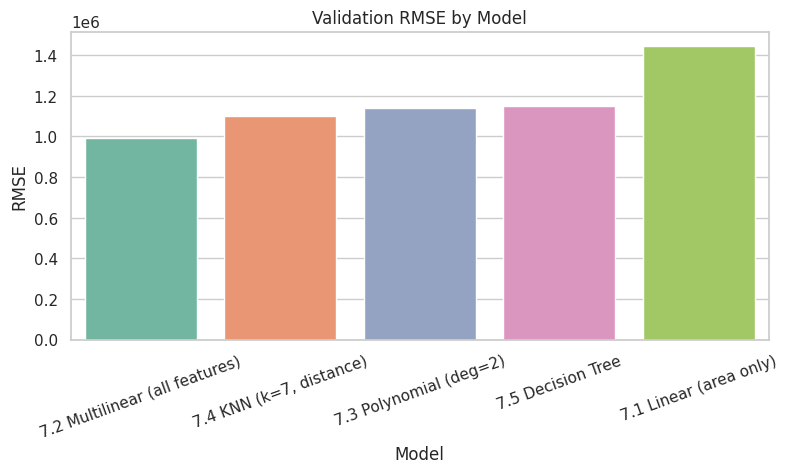

In [43]:

def regress_metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    r2   = r2_score(y_true, y_pred)
    return mae, rmse, r2

rows = []


mae, rmse, r2 = regress_metrics(y_val, y_val_pred_lr_single)
rows.append({'Model':'7.1 Linear (area only)', 'MAE':mae, 'RMSE':rmse, 'R2':r2})


mae, rmse, r2 = regress_metrics(y_val, y_val_pred_lr_multi)
rows.append({'Model':'7.2 Multilinear (all features)', 'MAE':mae, 'RMSE':rmse, 'R2':r2})


mae, rmse, r2 = regress_metrics(y_val, y_val_pred_poly)
rows.append({'Model':'7.3 Polynomial (deg=2)', 'MAE':mae, 'RMSE':rmse, 'R2':r2})


mae, rmse, r2 = regress_metrics(y_val, y_val_pred_knn)
rows.append({'Model':'7.4 KNN (k=7, distance)', 'MAE':mae, 'RMSE':rmse, 'R2':r2})


mae, rmse, r2 = regress_metrics(y_val, y_val_pred_dt)
rows.append({'Model':'7.5 Decision Tree', 'MAE':mae, 'RMSE':rmse, 'R2':r2})

metrics_val_df = pd.DataFrame(rows).sort_values(by='RMSE')
print("\nValidation metrics (sorted by RMSE):")
print(metrics_val_df.to_string(index=False))


plt.figure(figsize=(9,4))
sns.barplot(x='Model', y='RMSE', data=metrics_val_df, palette='Set2')
plt.title('Validation RMSE by Model'); plt.xticks(rotation=20)



# Predicted vs Actual (Validation) — all five side-by-side

In [44]:


plt.figure(figsize=(18,8))
models_preds = [
    ('Linear (area only)', y_val_pred_lr_single, 'tab:blue'),
    ('Multilinear',        y_val_pred_lr_multi,  'tab:orange'),
    ('Polynomial (deg=2)', y_val_pred_poly,      'tab:purple'),
    ('KNN (k=7)',          y_val_pred_knn,       'tab:green'),
    ('Decision Tree',      y_val_pred_dt,        'tab:red')
]


<Figure size 1800x800 with 0 Axes>

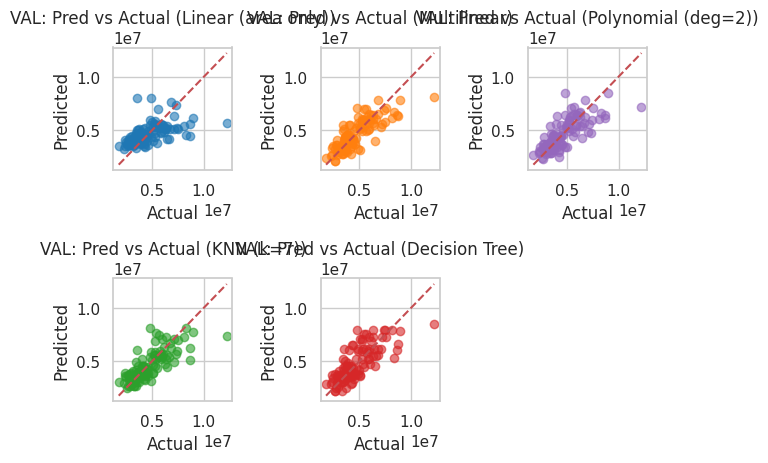

In [ ]:

for i, (title, yhat, color) in enumerate(models_preds, 1):
    plt.subplot(2,3,i)
    plt.scatter(y_val, yhat, alpha=0.6, color=color)
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
    plt.title(f'VAL: Pred vs Actual ({title})')
    plt.xlabel('Actual'); plt.ylabel('Predicted')
plt.tight_layout(); plt.show()


# Residuals distributions (Validation)

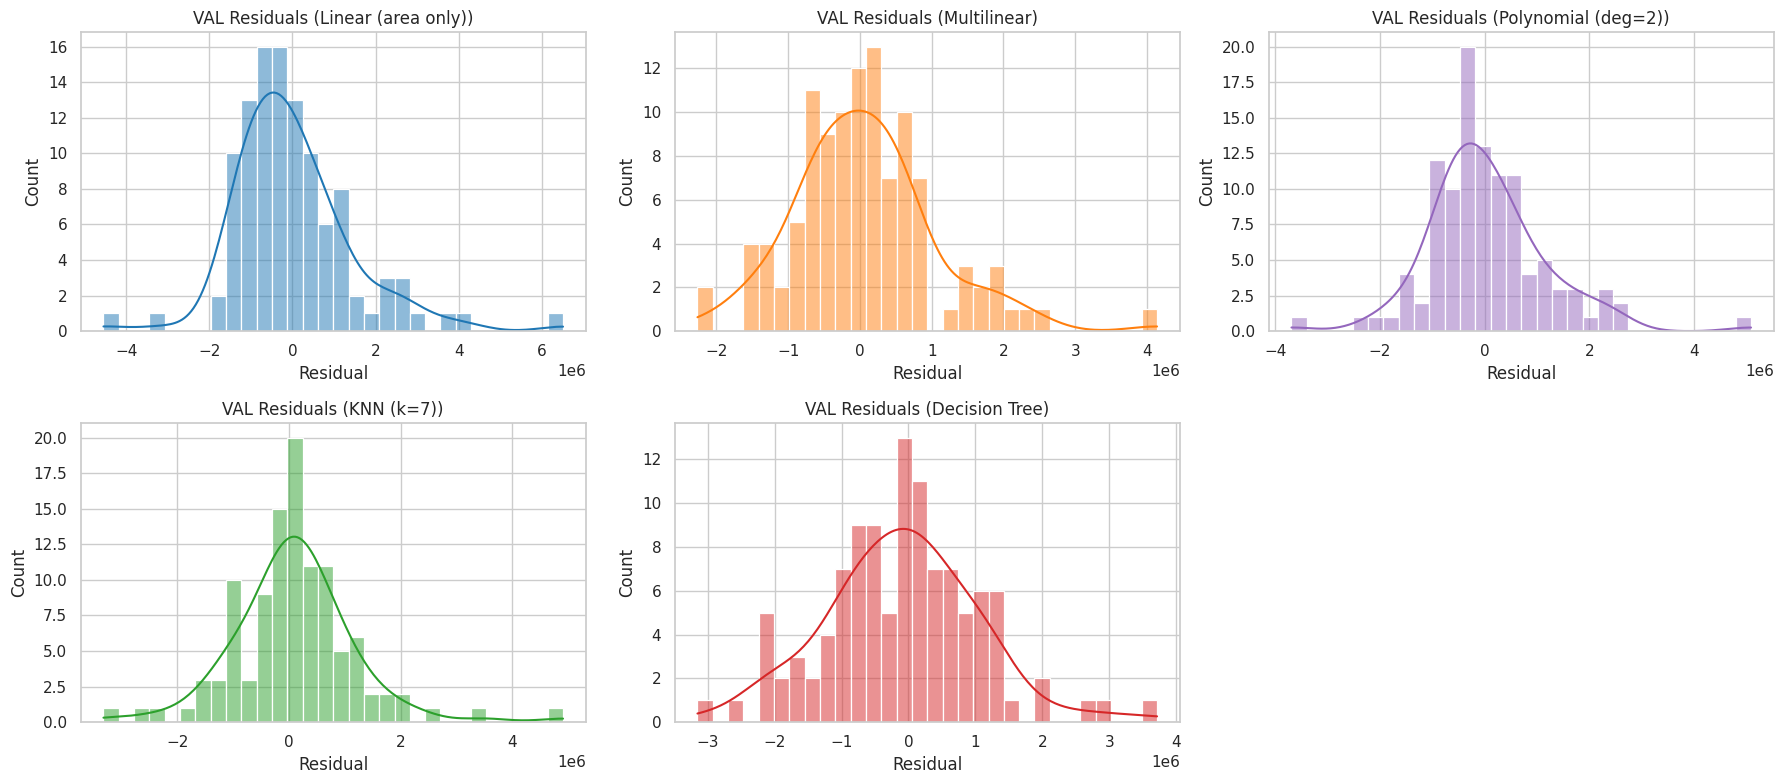

In [ ]:

plt.figure(figsize=(18,8))
for i, (title, yhat, color) in enumerate(models_preds, 1):
    plt.subplot(2,3,i)
    res = y_val - yhat
    sns.histplot(res, bins=30, kde=True, color=color)
    plt.title(f'VAL Residuals ({title})'); plt.xlabel('Residual')
plt.tight_layout(); plt.show()


# RMSE comparison bar chart (Validation)

/tmp/ipython-input-2211627653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics_val_df, palette='Set2')


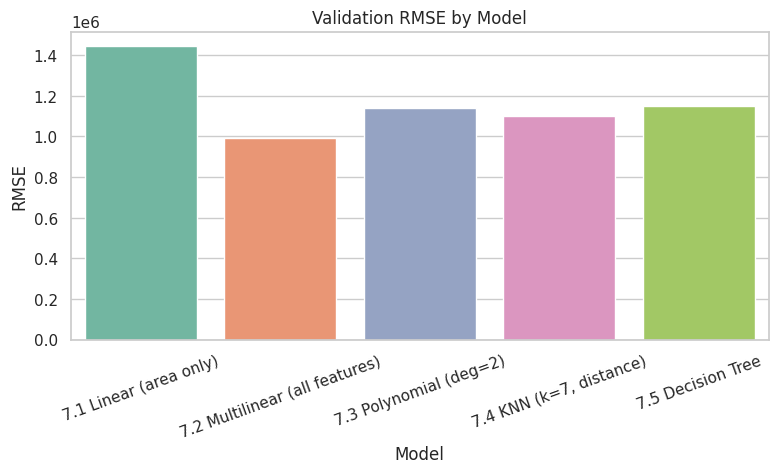

In [ ]:


plt.figure(figsize=(9,4))
sns.barplot(x='Model', y='RMSE', data=metrics_val_df, palette='Set2')
plt.title('Validation RMSE by Model')
plt.xticks(rotation=20)
plt.show()


# 11. Model Comparison already printed; choose the best

In [45]:
best_row = metrics_val_df.iloc[0]
best_model_name = best_row['Model']
print("\nStep 11: Best model on validation:", best_model_name)

# Map back to pipeline object for final training
name_to_pipe = {
    '7.1 Linear (area only)'         : pipe_lr_single,
    '7.2 Multilinear (all features)' : pipe_lr_multi,
    '7.3 Polynomial (deg=2)'         : pipe_poly,
    '7.4 KNN (k=7, distance)'        : pipe_knn,
    '7.5 Decision Tree'              : pipe_dt
}
final_model = name_to_pipe[best_model_name]



Step 11: Best model on validation: 7.2 Multilinear (all features)


# 12. Final Model Training (Train + Val)

In [46]:

print("\nStep 12: Final training (Train + Val)")
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)
final_model.fit(X_train_final, y_train_final)
print(f" Final model trained: {best_model_name}")



Step 12: Final training (Train + Val)
 Final model trained: 7.2 Multilinear (all features)


# 13.Unseen Test Evaluation

In [47]:

print("\nStep 13: Evaluate on Unseen Test")
y_test_pred = final_model.predict(X_test)
mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print(f"\nFinal model: {best_model_name}")
print(f"Test MAE : {mae_test:,.0f}")
print(f"Test RMSE: {rmse_test:,.0f}")
print(f"Test R²  : {r2_test:.3f}")



Step 13: Evaluate on Unseen Test

Final model: 7.2 Multilinear (all features)
Test MAE : 968,154
Test RMSE: 1,327,108
Test R²  : 0.652


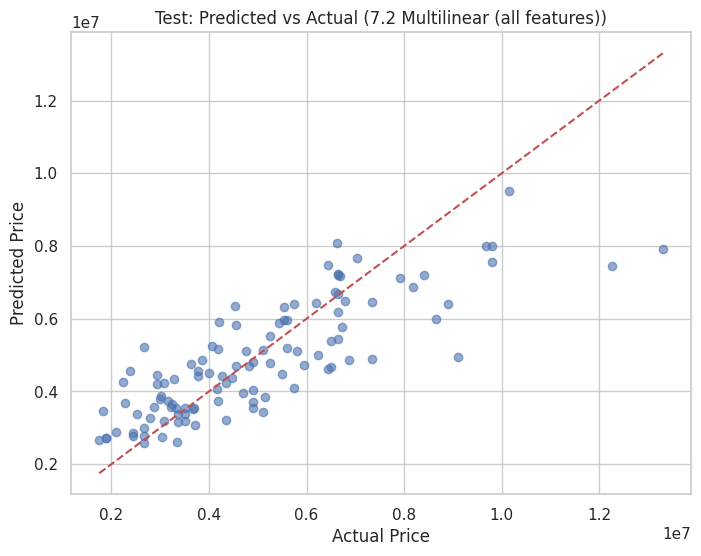

In [48]:

# Test Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Test: Predicted vs Actual ({best_model_name})')
plt.xlabel('Actual Price'); plt.ylabel('Predicted Price')
plt.show()
